## Carga de Datos

In [1]:
# Instalar
%pip install pyts
%pip install h5py

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import h5py
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from queue import PriorityQueue

In [3]:
def load_h5_to_dataframe(file_path):
    with h5py.File(file_path, "r") as f:

        dataframes = []
        for key in list(f.keys()):

            dataset = np.array(f[key])

            if dataset.ndim > 1:
                num_features = dataset.shape[1]
                columns = [f"{key}_{i}" for i in range(num_features)]
                df = pd.DataFrame(dataset, columns=columns)
            else:
                df = pd.DataFrame(dataset, columns=[key])

            dataframes.append(df)

        combined_df = pd.concat(dataframes, axis=1)
        return combined_df

## Particionamiento de datos

In [4]:
train_path = 'train.h5'
test_path = 'test.h5'

train_data = load_h5_to_dataframe(train_path)
test_data = load_h5_to_dataframe(test_path)

In [5]:
X = train_data.drop(columns=['y'])
Y = train_data['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.30, shuffle=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

### Reducción de dimensionalidad

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# IMPLEMENTACION DE KNN 

In [39]:
import numpy as np
from queue import PriorityQueue

class KNearestNeighbors:
    def __init__(self, k):
        self.k = k  
        self.X_train = None
        self.Y_train = None

    def _knn(self, p):
        k_dist = PriorityQueue(self.k)
        
        for i in range(len(self.X_train)):
            dist = np.linalg.norm(self.X_train[i] - p) 
            
            if not k_dist.full():
                k_dist.put((-dist, i))  
            else:
                least_min = k_dist.get()
                if dist < abs(least_min[0]):
                    k_dist.put((-dist, i))
                else:
                    k_dist.put(least_min)  
                    
        return k_dist

    def fit(self, X_train, Y_train):
        self.X_train = np.array(X_train)
        self.Y_train = list(Y_train)

    def predict(self, X_test):
        y_pred = []
        
        for i, p in enumerate(X_test):
            print(f"Procesando punto {i + 1} de {len(X_test)}")  
            
            k_elem = self._knn(p)  
            y_temp = []
            
            while not k_elem.empty():
                idx = k_elem.get()[1]
                y_temp.append(self.Y_train[idx])
            
            y_pred.append(max(set(y_temp), key=y_temp.count))
        
        return y_pred


### Probando modelo

In [40]:
knn_model = KNearestNeighbors(k=5)
knn_model.fit(X_train_pca, Y_train)
y_pred = knn_model.predict(X_test_pca)

Procesando punto 1 de 2206
Procesando punto 2 de 2206
Procesando punto 3 de 2206
Procesando punto 4 de 2206
Procesando punto 5 de 2206
Procesando punto 6 de 2206
Procesando punto 7 de 2206
Procesando punto 8 de 2206
Procesando punto 9 de 2206
Procesando punto 10 de 2206
Procesando punto 11 de 2206
Procesando punto 12 de 2206
Procesando punto 13 de 2206
Procesando punto 14 de 2206
Procesando punto 15 de 2206
Procesando punto 16 de 2206
Procesando punto 17 de 2206
Procesando punto 18 de 2206
Procesando punto 19 de 2206
Procesando punto 20 de 2206
Procesando punto 21 de 2206
Procesando punto 22 de 2206
Procesando punto 23 de 2206
Procesando punto 24 de 2206
Procesando punto 25 de 2206
Procesando punto 26 de 2206
Procesando punto 27 de 2206
Procesando punto 28 de 2206
Procesando punto 29 de 2206
Procesando punto 30 de 2206
Procesando punto 31 de 2206
Procesando punto 32 de 2206
Procesando punto 33 de 2206
Procesando punto 34 de 2206
Procesando punto 35 de 2206
Procesando punto 36 de 2206
P

### ACCURACY

In [41]:
from sklearn.metrics import accuracy_score

# Comparamos las predicciones con las etiquetas verdaderas
accuracy = accuracy_score(Y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")


Exactitud del modelo: 94.74%


### ENCONTRANDO EL MEJOR VALOR PARA K

In [42]:
from sklearn.metrics import accuracy_score

# Definir los valores de k que quieres probar
k_values = range(1, 5)  # Prueba k desde 1 hasta 5
best_k = 0
best_accuracy = 0

# Iterar sobre cada valor de k y medir el accuracy
for k in k_values:
    knn_model = KNearestNeighbors(k=k)
    knn_model.fit(X_train_pca, Y_train)
    y_pred = knn_model.predict(X_test_pca)
    
    # Calcular el accuracy con el valor actual de k
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"k = {k}, Accuracy = {accuracy * 100:.2f}%")
    
    # Guardar el mejor k y su accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Resultado final
print(f"El mejor valor de k es {best_k} con un accuracy de {best_accuracy * 100:.2f}%")

Procesando punto 1 de 2206
Procesando punto 2 de 2206
Procesando punto 3 de 2206
Procesando punto 4 de 2206
Procesando punto 5 de 2206
Procesando punto 6 de 2206
Procesando punto 7 de 2206
Procesando punto 8 de 2206
Procesando punto 9 de 2206
Procesando punto 10 de 2206
Procesando punto 11 de 2206
Procesando punto 12 de 2206
Procesando punto 13 de 2206
Procesando punto 14 de 2206
Procesando punto 15 de 2206
Procesando punto 16 de 2206
Procesando punto 17 de 2206
Procesando punto 18 de 2206
Procesando punto 19 de 2206
Procesando punto 20 de 2206
Procesando punto 21 de 2206
Procesando punto 22 de 2206
Procesando punto 23 de 2206
Procesando punto 24 de 2206
Procesando punto 25 de 2206
Procesando punto 26 de 2206
Procesando punto 27 de 2206
Procesando punto 28 de 2206
Procesando punto 29 de 2206
Procesando punto 30 de 2206
Procesando punto 31 de 2206
Procesando punto 32 de 2206
Procesando punto 33 de 2206
Procesando punto 34 de 2206
Procesando punto 35 de 2206
Procesando punto 36 de 2206
P

## Matriz de Confusión con el mejor K

In [43]:
knn_model = KNearestNeighbors(k=1)
knn_model.fit(X_train_pca, Y_train)
y_pred = knn_model.predict(X_test_pca)

Procesando punto 1 de 2206
Procesando punto 2 de 2206
Procesando punto 3 de 2206
Procesando punto 4 de 2206
Procesando punto 5 de 2206
Procesando punto 6 de 2206
Procesando punto 7 de 2206
Procesando punto 8 de 2206
Procesando punto 9 de 2206
Procesando punto 10 de 2206
Procesando punto 11 de 2206
Procesando punto 12 de 2206
Procesando punto 13 de 2206
Procesando punto 14 de 2206
Procesando punto 15 de 2206
Procesando punto 16 de 2206
Procesando punto 17 de 2206
Procesando punto 18 de 2206
Procesando punto 19 de 2206
Procesando punto 20 de 2206
Procesando punto 21 de 2206
Procesando punto 22 de 2206
Procesando punto 23 de 2206
Procesando punto 24 de 2206
Procesando punto 25 de 2206
Procesando punto 26 de 2206
Procesando punto 27 de 2206
Procesando punto 28 de 2206
Procesando punto 29 de 2206
Procesando punto 30 de 2206
Procesando punto 31 de 2206
Procesando punto 32 de 2206
Procesando punto 33 de 2206
Procesando punto 34 de 2206
Procesando punto 35 de 2206
Procesando punto 36 de 2206
P

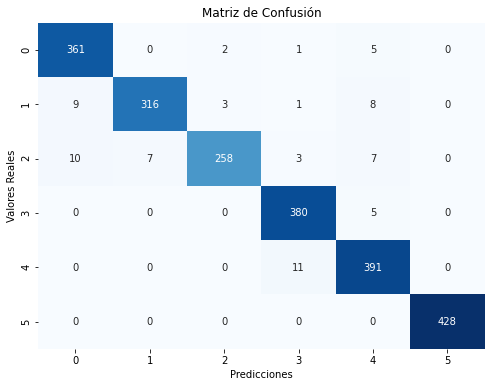

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes y_pred y Y_test

# Paso 1: Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Paso 2: Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=True, yticklabels=True)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


__________________________________________________________________________________

# Intentos de implementaciones que no se ajustaron a los datos

## Regresión polinomial

In [17]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Ajustar el modelo de regresión polinomial
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predicción en el set de test
y_pred = model.predict(X_test_poly)

# Evaluación del modelo
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.681444162166373
R² Score: 0.7780191152346965


In [23]:
print("X_test_pca: ",len(X_test_pca))

print("X_train_pca: ",len(X_train_pca))

print("y_pred: ",len(y_pred))

print("Y_test: ", len(Y_test))

X_test_pca:  2206
X_train_pca:  5146
y_pred:  2206
Y_test:  2206


NO SE PUEDE GRAFICAR COMO LÍNEA

No handles with labels found to put in legend.


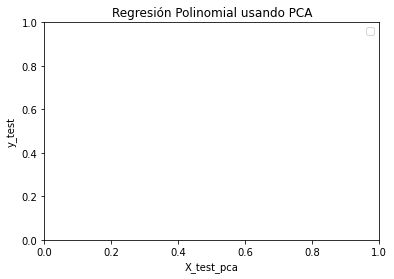

In [27]:
#Gráfico (opcional si X_train_pca es de una sola dimensión)
plt.scatter(X_test_pca, Y_test, color='blue', label='Datos Reales')
plt.scatter(X_test_pca, y_pred, color='red', label='Predicciones')
plt.xlabel('X_test_pca')
plt.ylabel('y_test')
plt.legend()
plt.title('Regresión Polinomial usando PCA')
plt.show()

In [33]:
Y_test

2621    6.0
6730    1.0
3121    4.0
5741    4.0
2207    2.0
       ... 
4246    4.0
4354    2.0
5533    4.0
705     5.0
1485    5.0
Name: y, Length: 2206, dtype: float64

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(Y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

SE PROBÓ SVM LINEAL, POLYNOMIAL REGRESSION SIN ÉXITO